In [2]:
import os
import sys
import numpy as np
import cv2
import sklearn
import fnmatch
from matplotlib import pyplot as plt
import imutils
sys.path.insert(0, os.path.abspath('../..'))

file_under_use = 'images_qual_nobg/'
imagePixelSize = 16

In [3]:
mushroomNames = []
for mushroomName in os.listdir('../../MushroomImage/' + file_under_use):
    mushroomNames.append(mushroomName)

In [4]:
numImages = 0
for mushroomName in mushroomNames:
    for imageName in os.listdir('../../MushroomImage/' + file_under_use + mushroomName):
        numImages += 1
print(numImages)

600


In [5]:
index = 0
testCount = 0
trainCount = 0
for mushroomName in mushroomNames:
    dirListing = os.listdir('../../MushroomImage/' + file_under_use + mushroomName)
    numImages = len(dirListing) 
    train = int(numImages * (3/4))
    count = 0
    for imageName in os.listdir('../../MushroomImage/' + file_under_use + mushroomName):
        
        if count <= train:
            trainCount += 1
        else:
            testCount += 1
        index += 1
        count += 1
        
print(testCount)
print(trainCount)

144
456


In [9]:
images_train = np.empty([trainCount, imagePixelSize+1]) 
images_test = np.empty([testCount, imagePixelSize+1]) 


def extract_lines(image):
    median_intensity = np.median(image)
    image = cv2.resize(image, (40,40))
    lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
    upper_threshold = int(max(255, (1.0 + 0.33) * median_intensity))
    eigenvalues, eigenvectors = np.linalg.eig(image)
    image = cv2.Canny(image, lower_threshold, upper_threshold)
    zoned_image = np.empty([4,4])
    plt.imshow(image, cmap="gray")
    plt.show()
    for i in range(0,4):
        for j in range(0, 4):
            image_small = image[i*10:i*10+10,j*10:j*10+10]
            zoned_image[i,j] = np.count_nonzero(image_small)
            

    #return eigenvectors.flatten()       
    return zoned_image.flatten()
    
    
    
    



10056_Agaricus_arvensis/APE2017-9209310_rJd8SrecZ.JPG


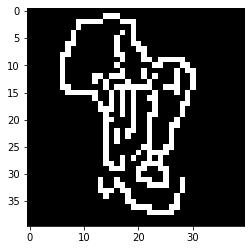

10056_Agaricus_arvensis/APE2017-9209310_rk8qFXlcZ.JPG


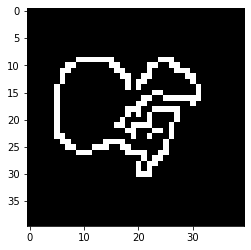

10056_Agaricus_arvensis/APE2017-9209310_ryWuUHHx9b.JPG


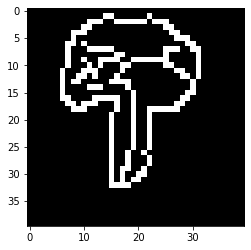

10056_Agaricus_arvensis/APE2017-9209310_S1M_UBBlqb.JPG


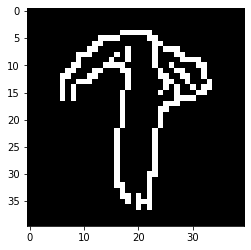

10056_Agaricus_arvensis/APE2017-9209310_SkWL9t7e5-.JPG


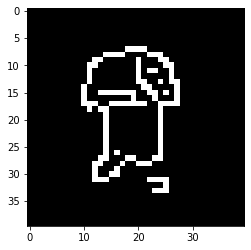

10056_Agaricus_arvensis/APE2017-9209310_Syx_8HSecZ.JPG


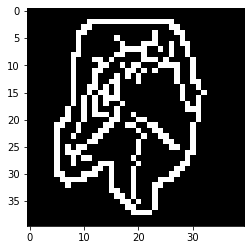

10056_Agaricus_arvensis/AS2012PIC11808823.JPG


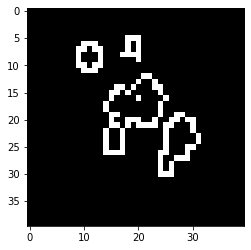

10056_Agaricus_arvensis/AS2012PIC17550074.JPG


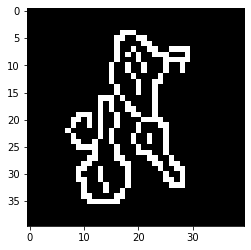

10056_Agaricus_arvensis/AS2017-9198855_SJ-mXmBz8Z.JPG


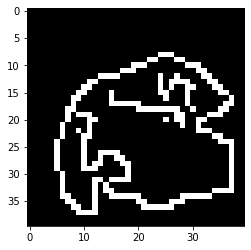

10056_Agaricus_arvensis/AS2017-9198855_SJ7mmrzLW.JPG


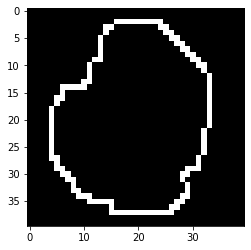

10056_Agaricus_arvensis/AS2017-9198855_SJlX77rf8b.JPG


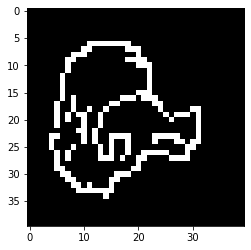

10056_Agaricus_arvensis/BEC2017-9193117_BkvFfskZ-.JPG


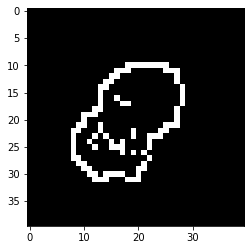

10056_Agaricus_arvensis/BEC2017-9193117_ByennliyWW.JPG


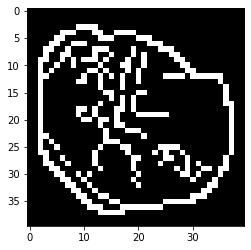

10056_Agaricus_arvensis/BEC2017-9193117_Hkl2MWjyb-.JPG


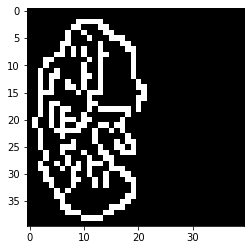

10056_Agaricus_arvensis/BEC2017-9193117_Sk2fbiyW-.JPG


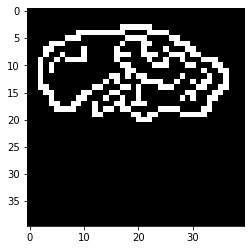

10056_Agaricus_arvensis/BEC2017-9194393_rklwl2UOf-.JPG


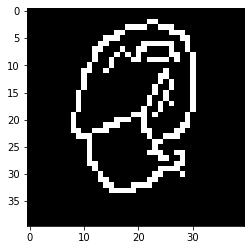

10056_Agaricus_arvensis/BEC2017-9194393_SJVXnLufW.JPG


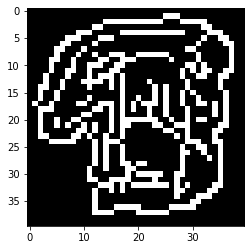

10056_Agaricus_arvensis/BEC2017-9194393_SylNXnLdz-.JPG


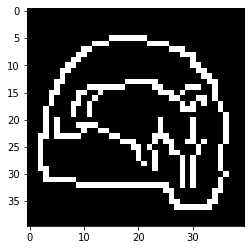

10056_Agaricus_arvensis/BEC2017-9194393_SywgnU_Gb.JPG


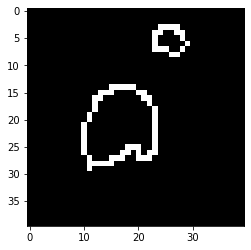

10056_Agaricus_arvensis/BEC2017-9195590_BJgSJGRSQ-.JPG


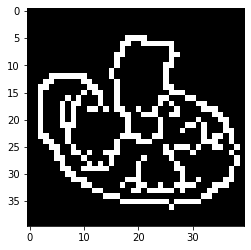

10056_Agaricus_arvensis/BEC2017-9195590_HJeJqWCrmZ.JPG


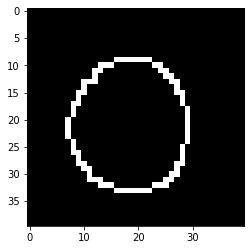

10056_Agaricus_arvensis/BEC2017-9195590_HJgKLbCBmW.JPG


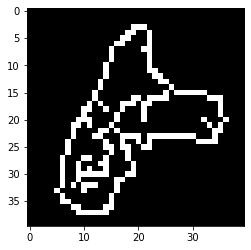

10056_Agaricus_arvensis/BEC2017-9195590_SytI-0Smb.JPG


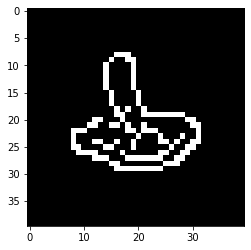

10056_Agaricus_arvensis/BWP2010PIC40172570.JPG


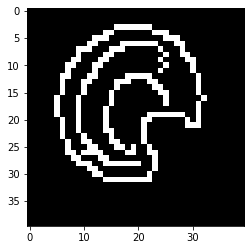

10056_Agaricus_arvensis/BWP2010PIC87596334.JPG


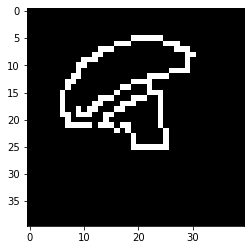

10056_Agaricus_arvensis/BWP2011PIC40581780.JPG


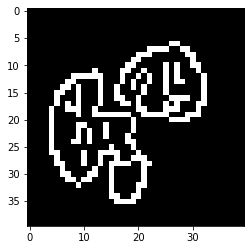

10056_Agaricus_arvensis/BWP2011PIC60544516.JPG


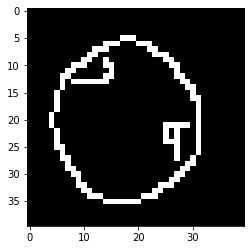

10056_Agaricus_arvensis/BWP2011PIC82503295.JPG


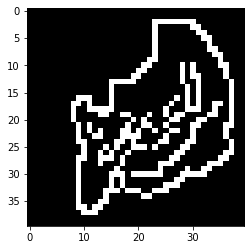

10056_Agaricus_arvensis/BWP2011PIC86347355.JPG


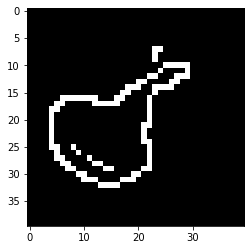

10056_Agaricus_arvensis/BWP2013PIC11660815.JPG


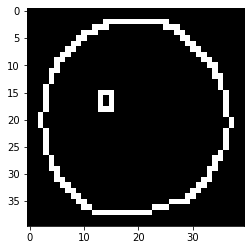

10056_Agaricus_arvensis/BWP2013PIC57155181.JPG


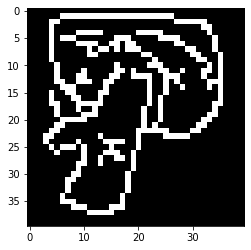

10056_Agaricus_arvensis/BWP2013PIC83608329.JPG


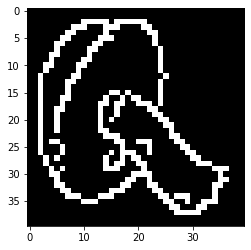

10056_Agaricus_arvensis/BWP2014PIC36031335.JPG


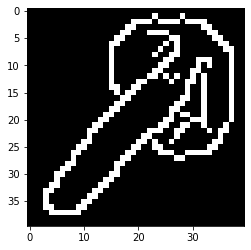

10056_Agaricus_arvensis/BWP2014PIC41929554.JPG


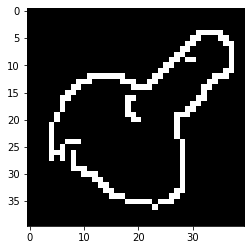

10056_Agaricus_arvensis/CL2010PIC12882174.JPG


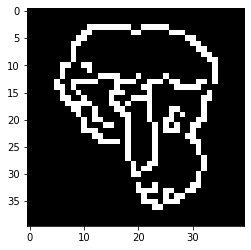

10056_Agaricus_arvensis/DB2011PIC75704959.JPG


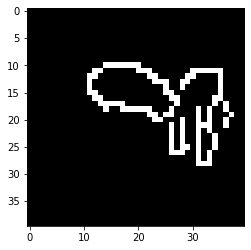

10056_Agaricus_arvensis/DI2017-9212509_HkDeq4n5W.JPG


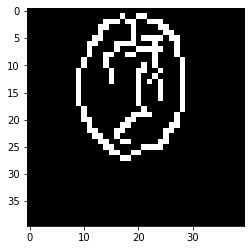

10056_Agaricus_arvensis/DI2017-9212509_SJZDe9En5-.JPG


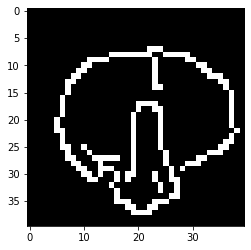

10056_Agaricus_arvensis/DI2017-9219370_Hy9iCT9oZ.JPG


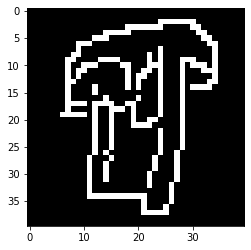

10056_Agaricus_arvensis/EMB2013PIC28495280.JPG


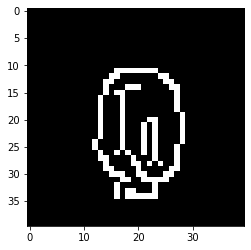

10056_Agaricus_arvensis/EMB2013PIC36163861.JPG


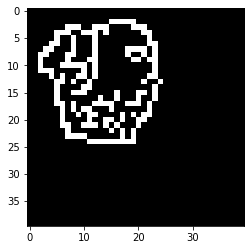

10056_Agaricus_arvensis/EMB2013PIC37609075.JPG


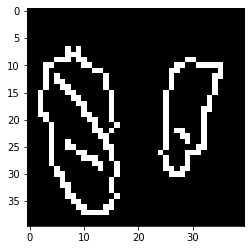

10056_Agaricus_arvensis/EMB2013PIC80495998.JPG


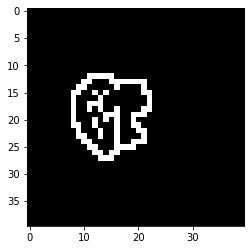

10056_Agaricus_arvensis/FDE2013PIC10287096.JPG


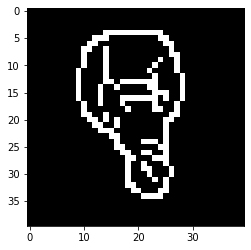

10056_Agaricus_arvensis/FDE2013PIC53425445.JPG


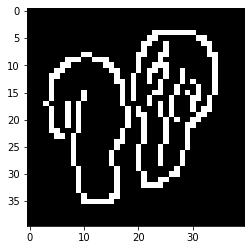

10056_Agaricus_arvensis/FDE2015PIC10021292.JPG


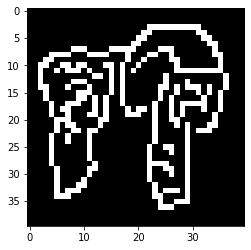

10056_Agaricus_arvensis/FDE2015PIC30275970.JPG


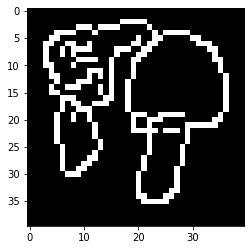

10056_Agaricus_arvensis/FDE2017-9197098_rJSoPQTVb.JPG


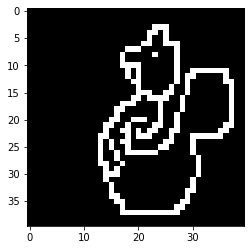

10056_Agaricus_arvensis/FS2017-9207318_BJgfTwxNYZ.JPG


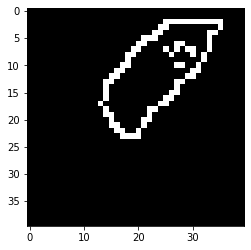

10056_Agaricus_arvensis/FS2017-9207318_BkfMTDgVFW.JPG


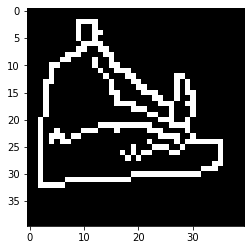

10056_Agaricus_arvensis/FS2017-9207318_SyZz6DgVYb.JPG


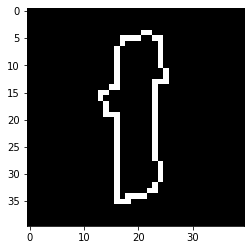

10056_Agaricus_arvensis/GSC2010PIC31534186.JPG


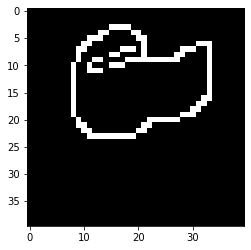

10056_Agaricus_arvensis/GSC2010PIC44877967.JPG


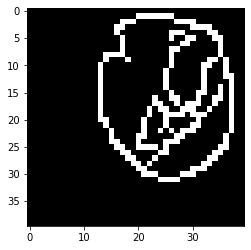

10056_Agaricus_arvensis/GSC2010PIC70848917.JPG


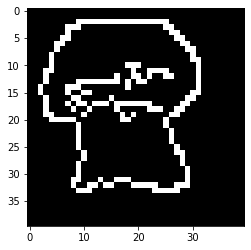

10056_Agaricus_arvensis/GSC2010PIC72325636.JPG


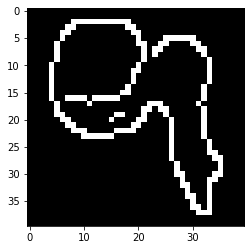

10056_Agaricus_arvensis/GSC2010PIC76829009.JPG


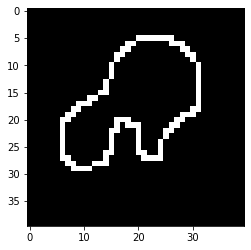

10056_Agaricus_arvensis/GSC2011PIC37291303.JPG


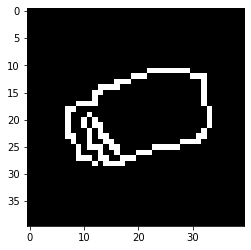

10056_Agaricus_arvensis/GSC2011PIC85880378.JPG


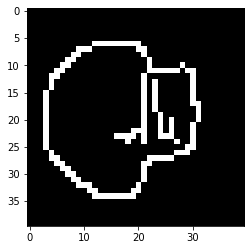

10056_Agaricus_arvensis/GSC2013PIC19554217.JPG


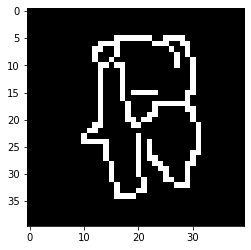

10056_Agaricus_arvensis/GSC2013PIC26246420.JPG


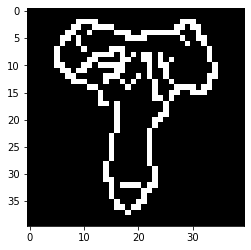

10056_Agaricus_arvensis/GSC2013PIC57696422.JPG


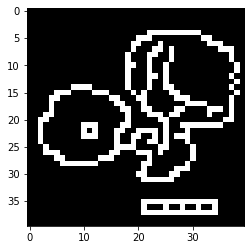

10056_Agaricus_arvensis/GSC2013PIC67573157.JPG


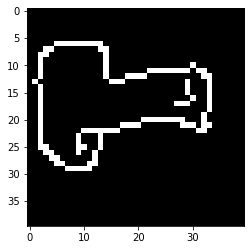

10056_Agaricus_arvensis/GSC2015PIC61700185.JPG


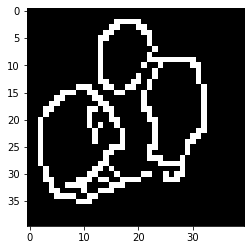

10056_Agaricus_arvensis/GSC2016-9167426_rJHZd9fD.JPG


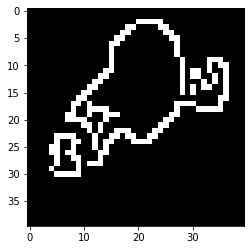

10056_Agaricus_arvensis/GSC2017-9196600_rkaazvrNW.JPG


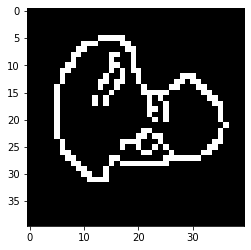

10056_Agaricus_arvensis/HD2017-9210960_ByQMzFL9Z.JPG


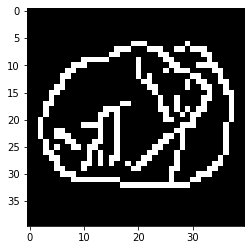

10056_Agaricus_arvensis/HD2017-9210960_S1GXGzY8c-.JPG


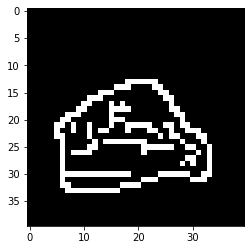

10056_Agaricus_arvensis/HD2017-9210960_SkmmMzYI9-.JPG


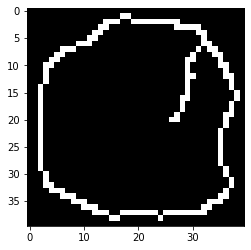

10056_Agaricus_arvensis/JC2017-9216258_B1MJtkm4iZ.JPG


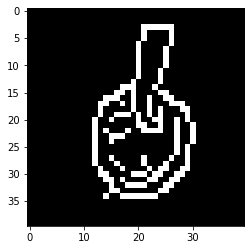

10056_Agaricus_arvensis/JC2017-9216258_rJktk7Vi-.JPG


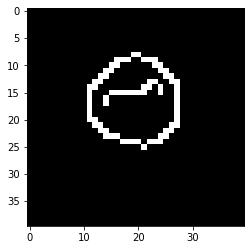

10056_Agaricus_arvensis/JC2017-9216258_SkWktJmEoW.JPG


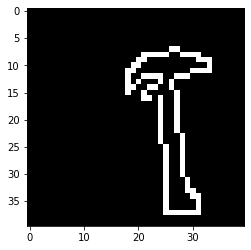

10056_Agaricus_arvensis/JCS2010PIC18688596.JPG


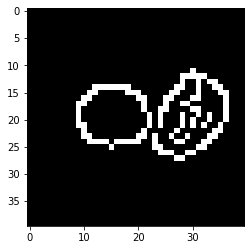

10056_Agaricus_arvensis/JCS2010PIC23914248.JPG


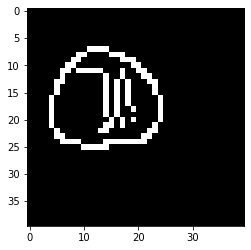

10056_Agaricus_arvensis/JCS2011PIC88233878.JPG


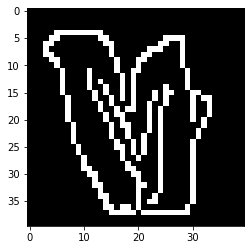

10056_Agaricus_arvensis/JM2010PIC43722110.JPG


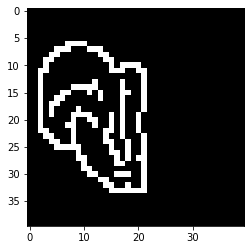

10056_Agaricus_arvensis/JM2010PIC57870758.JPG


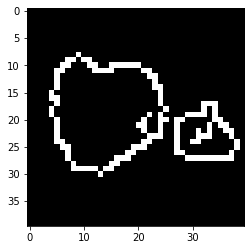

10056_Agaricus_arvensis/JM2010PIC61119493.JPG


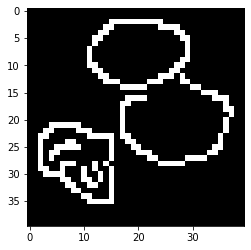

10056_Agaricus_arvensis/JM2011PIC13873259.JPG


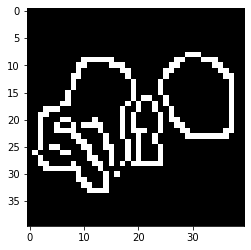

10056_Agaricus_arvensis/JM2012PIC10068727.JPG


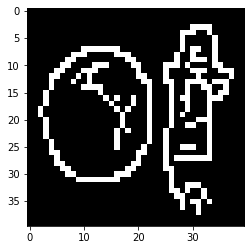

10056_Agaricus_arvensis/JM2012PIC68640399.JPG


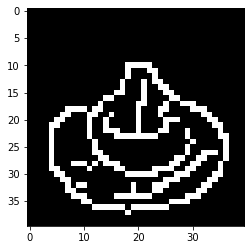

10056_Agaricus_arvensis/JM2017-9214806_HyFsC4-sb.JPG


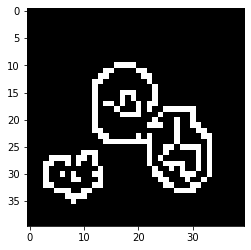

10056_Agaricus_arvensis/KIRSP2017-9203240_Bye8WEAw-.JPG


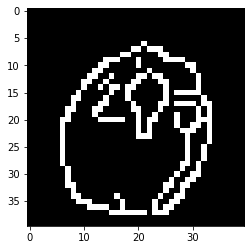

10056_Agaricus_arvensis/KIRSP2017-9203240_SJbgI-40vW.JPG


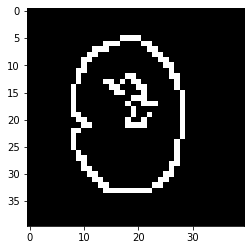

10056_Agaricus_arvensis/LB2009PIC23813694.JPG


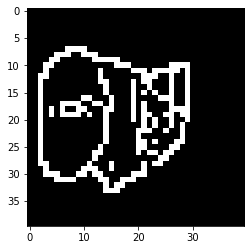

10056_Agaricus_arvensis/LB2009PIC29794429.JPG


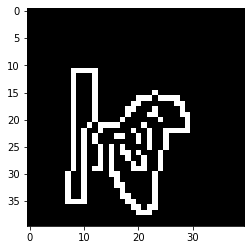

10056_Agaricus_arvensis/LB2010PIC59254375.JPG


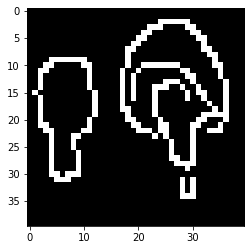

10056_Agaricus_arvensis/LB2013PIC41670054.JPG


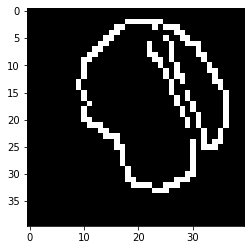

10056_Agaricus_arvensis/LB2013PIC42914259.JPG


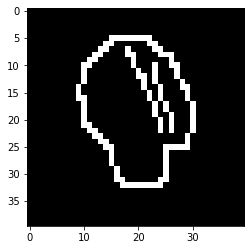

10056_Agaricus_arvensis/LB2013PIC64851457.JPG


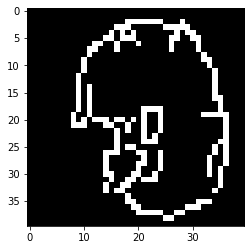

10056_Agaricus_arvensis/LB2014PIC75668486.JPG


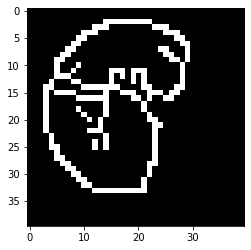

10056_Agaricus_arvensis/LSA2009PIC17523726.JPG


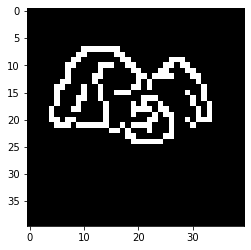

10056_Agaricus_arvensis/LSA2012PIC44765697.JPG


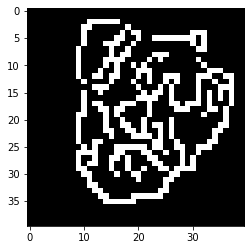

10056_Agaricus_arvensis/LWL2010PIC49073945.JPG


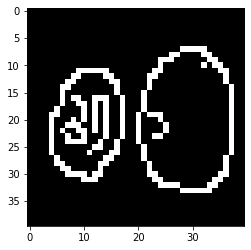

10056_Agaricus_arvensis/LWL2011PIC40629645.JPG


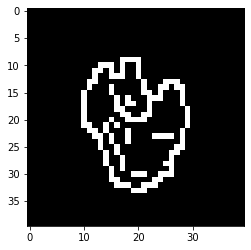

10056_Agaricus_arvensis/LWL2011PIC57245077.JPG


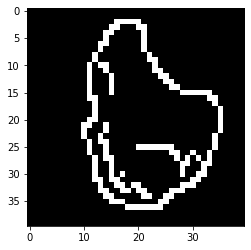

10056_Agaricus_arvensis/MAKE2017-9212111_Hyf-tyjqW.JPG


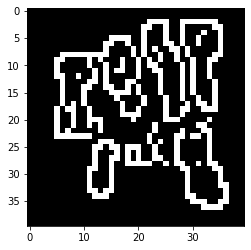

10056_Agaricus_arvensis/MAKE2017-9212111_r1lG-tyj5b.JPG


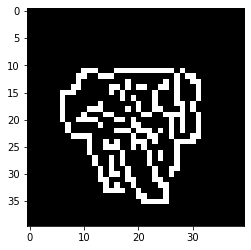

10056_Agaricus_arvensis/MAV2013PIC35051589.JPG


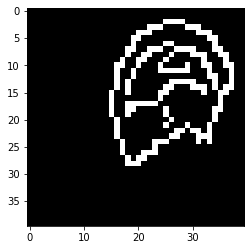

10056_Agaricus_arvensis/MAV2015PIC15623431.JPG


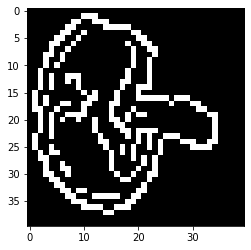

10056_Agaricus_arvensis/MAV2017-9221402_SJOTW9JhZ.JPG


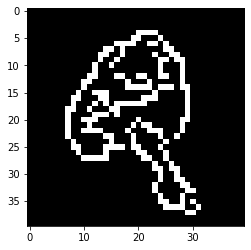

10252_Amanita_muscaria/ALP2010PIC55950385 - Copy.JPG


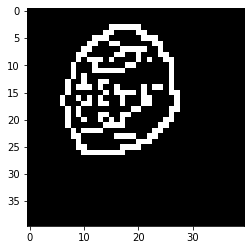

10252_Amanita_muscaria/ALP2010PIC55950385.JPG


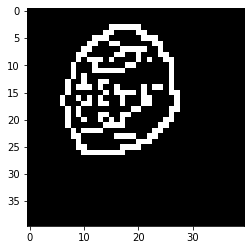

10252_Amanita_muscaria/ANJE2017-9207903_H1GF2pLYZ - Copy.JPG


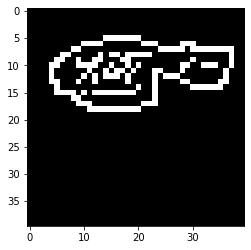

10252_Amanita_muscaria/ANJE2017-9207903_H1GF2pLYZ.JPG


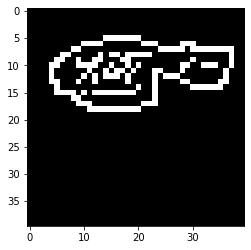

10252_Amanita_muscaria/ANJE2017-9207903_rkezK2p8YW - Copy.JPG


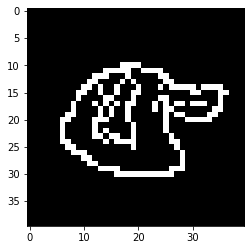

10252_Amanita_muscaria/ANJE2017-9207903_rkezK2p8YW.JPG


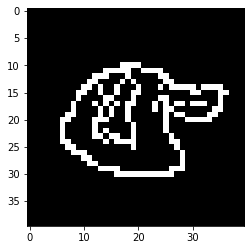

10252_Amanita_muscaria/ANR2016-9178849_S186dgVye - Copy.JPG


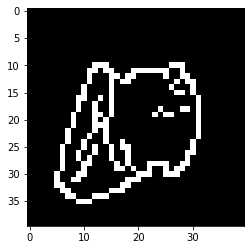

10252_Amanita_muscaria/ANR2016-9178849_S186dgVye.JPG


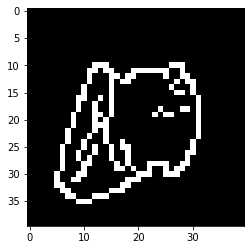

10252_Amanita_muscaria/APE2017-9208214_SyWcO5dYb - Copy.JPG


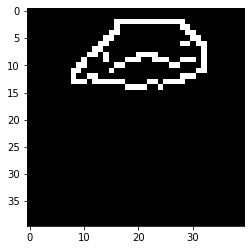

10252_Amanita_muscaria/APE2017-9208214_SyWcO5dYb.JPG


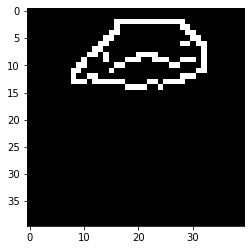

10252_Amanita_muscaria/APE2017-9214512_HkNtQLloW - Copy.JPG


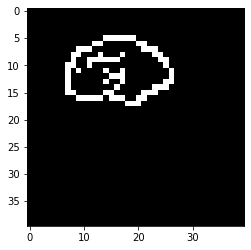

10252_Amanita_muscaria/APE2017-9214512_HkNtQLloW.JPG


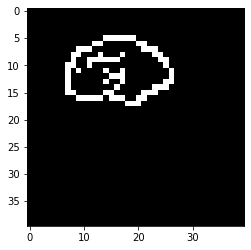

10252_Amanita_muscaria/APE2017-9214515_SJNW48xoZ - Copy.JPG


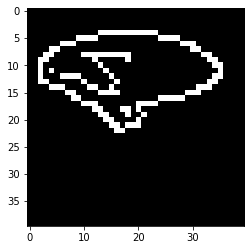

10252_Amanita_muscaria/APE2017-9214515_SJNW48xoZ.JPG


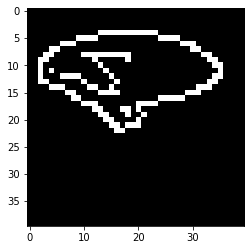

10252_Amanita_muscaria/BT2013PIC62306138 - Copy.JPG


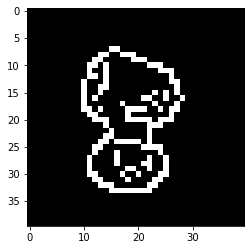

10252_Amanita_muscaria/BT2013PIC62306138.JPG


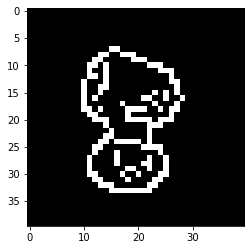

10252_Amanita_muscaria/BWP2009PIC47939011 - Copy.JPG


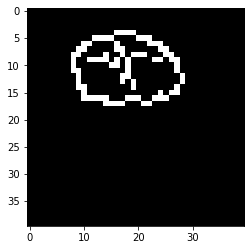

10252_Amanita_muscaria/BWP2009PIC47939011.JPG


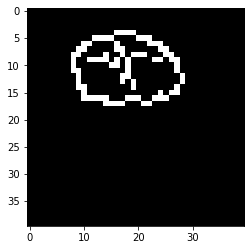

10252_Amanita_muscaria/BWP2013PIC50347031 - Copy.JPG


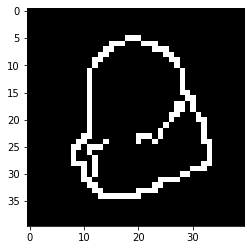

10252_Amanita_muscaria/BWP2013PIC50347031.JPG


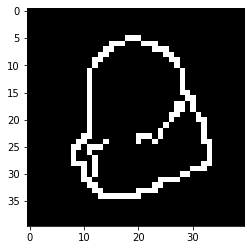

10252_Amanita_muscaria/BWP2014PIC45863237.JPG


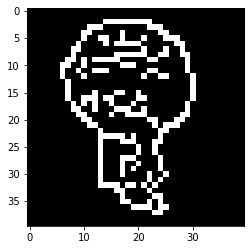

10252_Amanita_muscaria/CS2015PIC68244856.JPG


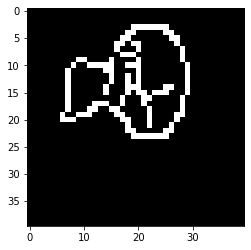

10252_Amanita_muscaria/CUV2017-9224390_BJDKFy_hb.JPG


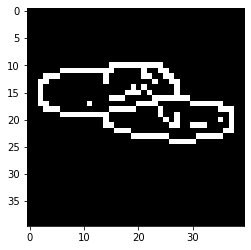

10252_Amanita_muscaria/CUV2017-9224390_SkxvFtkOhZ.JPG


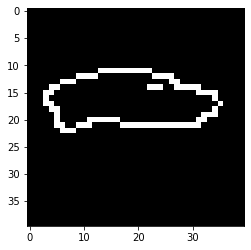

10252_Amanita_muscaria/DI2010PIC61382023.JPG


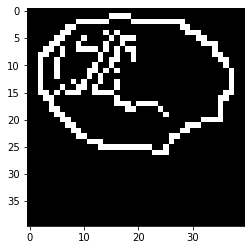

10252_Amanita_muscaria/DI2017-9202755_BkJQ8unDZ.JPG


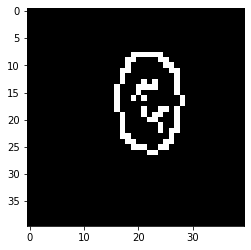

10252_Amanita_muscaria/EKV2017-9211809_BJUojCFcb.JPG


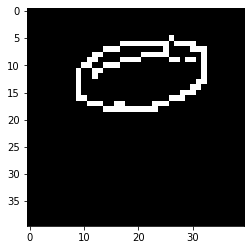

10252_Amanita_muscaria/EKV2017-9219519_H1Rkpasj-.JPG


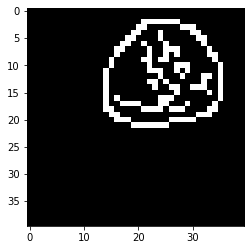

10252_Amanita_muscaria/EKV2017-9219519_HkgR1aTjsb.JPG


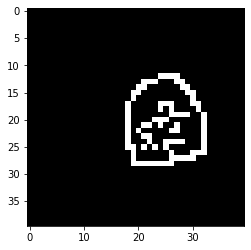

10252_Amanita_muscaria/EKV2017-9222326_SJjNKU-nb.JPG


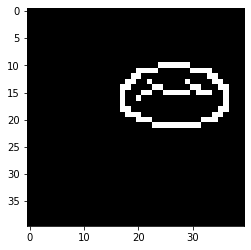

10252_Amanita_muscaria/ELAU2017-9211804_B1p133F9b.JPG


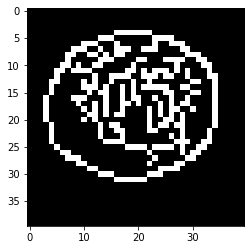

10252_Amanita_muscaria/ELAU2017-9222779_B1MXqaz3W.JPG


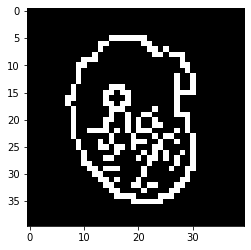

10252_Amanita_muscaria/FDE2009PIC55537599.JPG


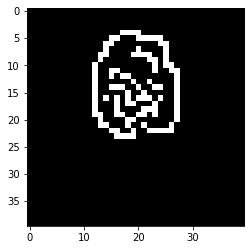

10252_Amanita_muscaria/FDE2009PIC75082319.JPG


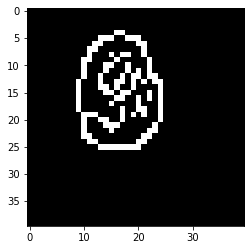

10252_Amanita_muscaria/FDE2009PIC81824590.JPG


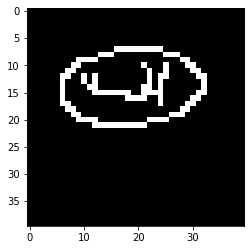

10252_Amanita_muscaria/FDE2009PIC86082291.JPG


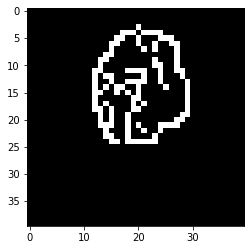

10252_Amanita_muscaria/FDE2010PIC72746551.JPG


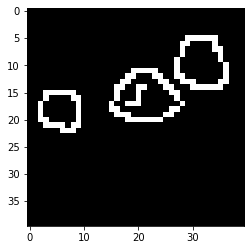

10252_Amanita_muscaria/FDE2012PIC51504719.JPG


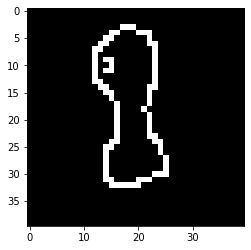

10252_Amanita_muscaria/FDE2013PIC40079227.JPG


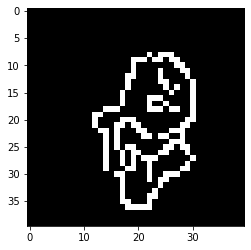

10252_Amanita_muscaria/FDE2014PIC30286365.JPG


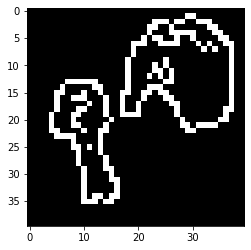

10252_Amanita_muscaria/FDE2014PIC32280044.JPG


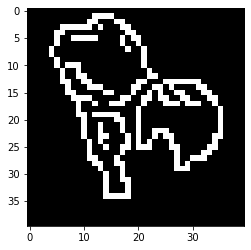

10252_Amanita_muscaria/FS2009PIC89768601.JPG


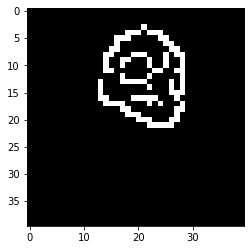

10252_Amanita_muscaria/FS2011PIC82951874.JPG


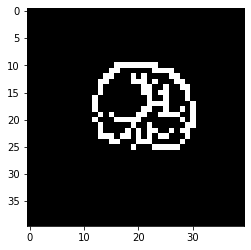

10252_Amanita_muscaria/FS2012PIC75918334.JPG


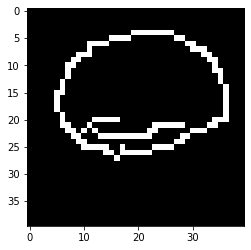

10252_Amanita_muscaria/FS2013PIC52368512.JPG


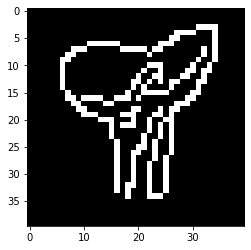

10252_Amanita_muscaria/FS2013PIC58647292.JPG


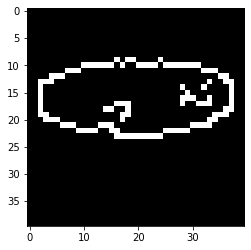

10252_Amanita_muscaria/FS2016-9183503_ByRnuzjMe.JPG


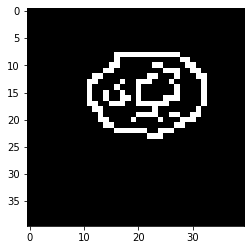

10252_Amanita_muscaria/FS2017-9211125_SJkQRlv9Z.JPG


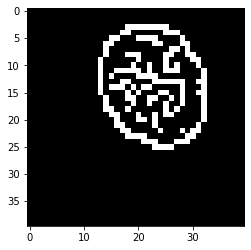

10252_Amanita_muscaria/FS2017-9216003_r1FC2iXoW.JPG


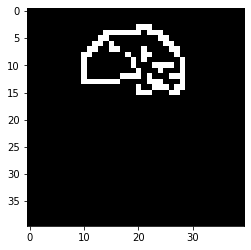

10252_Amanita_muscaria/GLJ2010PIC10309551.JPG


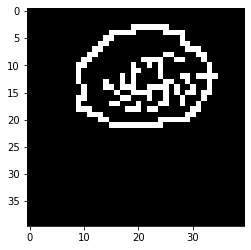

10252_Amanita_muscaria/GLJ2011PIC45629791.JPG


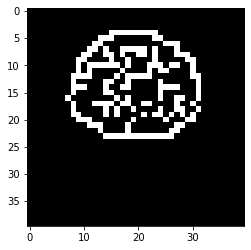

10252_Amanita_muscaria/GLJ2012PIC42180563.JPG


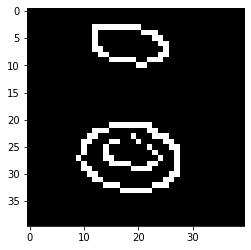

10252_Amanita_muscaria/GLJ2012PIC67095628.JPG


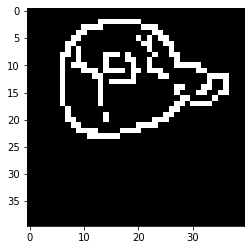

10252_Amanita_muscaria/GLJ2014PIC69909262.JPG


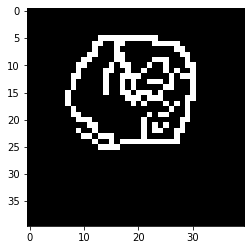

10252_Amanita_muscaria/GSC2012PIC49620821.JPG


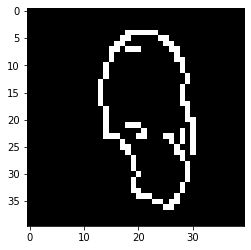

10252_Amanita_muscaria/JAJ2016-9180472_B1Mr6n1ge.JPG


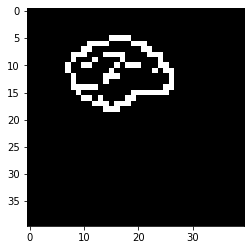

10252_Amanita_muscaria/JAJ2016-9181296_BJYSzv8ex.JPG


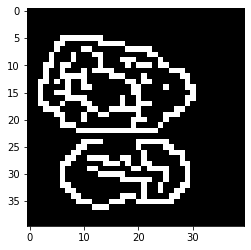

10252_Amanita_muscaria/JAJ2017-9200333_Bk-MWTrAU-.JPG


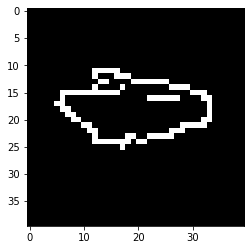

10252_Amanita_muscaria/JAJ2017-9200333_SJgMb6r08W.JPG


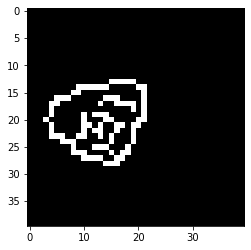

10252_Amanita_muscaria/JAJ2017-9206331_r1eWUFXyt-.JPG


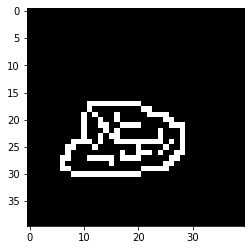

10252_Amanita_muscaria/JAJ2017-9206336_H12Xjm1tW.JPG


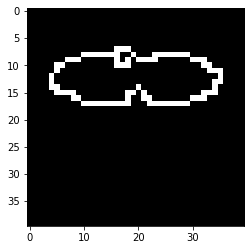

10252_Amanita_muscaria/JAJ2017-9208575_HJ6lbliY-.JPG


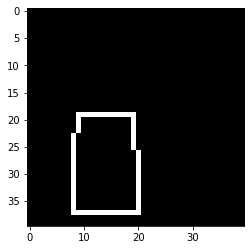

10252_Amanita_muscaria/JAJ2017-9208575_SJepgZljF-.JPG


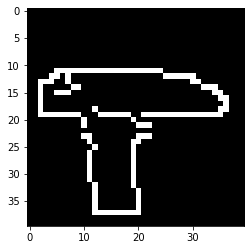

10252_Amanita_muscaria/JAJ2017-9211927_B14335qqW.JPG


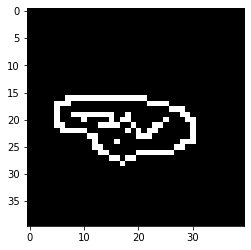

10252_Amanita_muscaria/JAJ2017-9223933_B10z5c82W.JPG


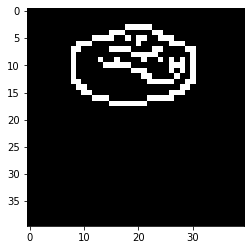

10252_Amanita_muscaria/JMI2017-9206601_rycWlolFb.JPG


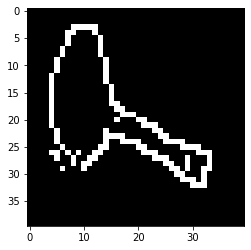

10252_Amanita_muscaria/JSH2017-9223473_H1-10Lr3Z.JPG


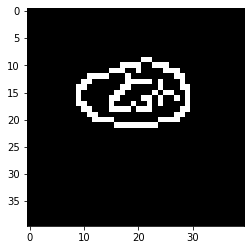

10252_Amanita_muscaria/KIRSP2017-9212612_B1KCgOnq-.JPG


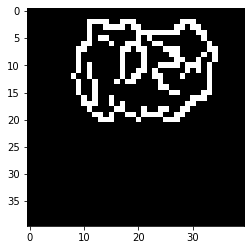

10252_Amanita_muscaria/KKN2015PIC81363604.JPG


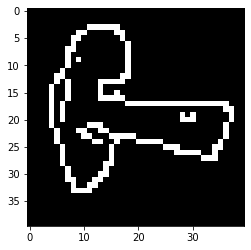

10252_Amanita_muscaria/KMA2017-9198685_BJH3_TWUZ.JPG


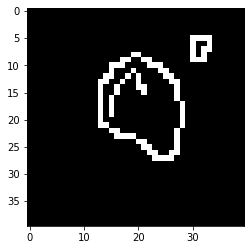

10252_Amanita_muscaria/KNN2017-9226535_HkV9oN0hZ.JPG


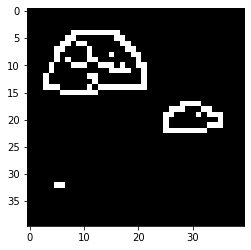

10252_Amanita_muscaria/LB2017-9201339_SkexykhVP-.JPG


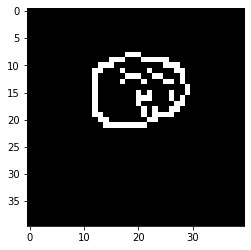

10252_Amanita_muscaria/LWI2012PIC42568890.JPG


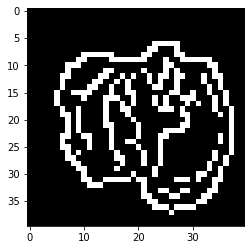

10252_Amanita_muscaria/MAH2015PIC30006788.JPG


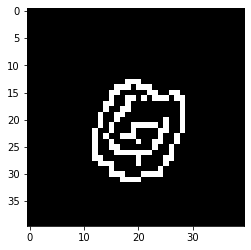

10252_Amanita_muscaria/MAKE2017-9207614_SkgBVyKBKW.JPG


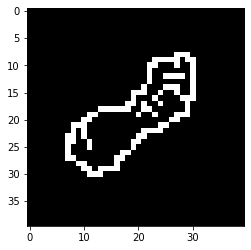

10252_Amanita_muscaria/MAKE2017-9207614_SyH4ytBKb.JPG


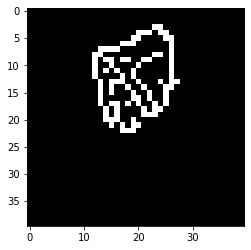

10252_Amanita_muscaria/MAZ2016-9178584_BJxnrJKGJx.JPG


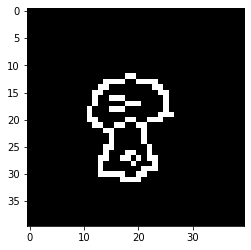

10252_Amanita_muscaria/MC2017-9210124_H19GQf7qb.JPG


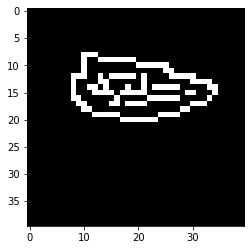

10252_Amanita_muscaria/MC2017-9216094_B10FuJEsZ.JPG


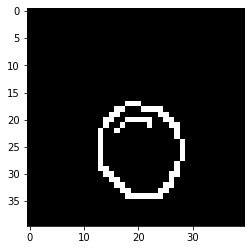

10252_Amanita_muscaria/MC2017-9228315_Hk2YZA4pW.JPG


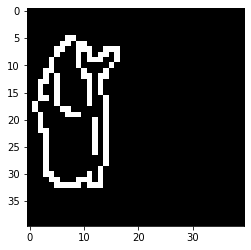

10252_Amanita_muscaria/MIH2001-9191778_S1iJ8qVJ-.JPG


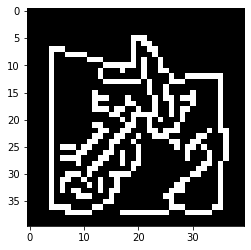

10252_Amanita_muscaria/MS2014PIC63078065.JPG


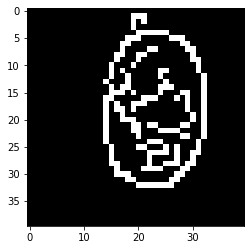

10252_Amanita_muscaria/OHC2010PIC22304042.JPG


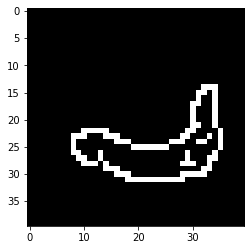

10252_Amanita_muscaria/PEH2017-9222149_BkIhICghZ.JPG


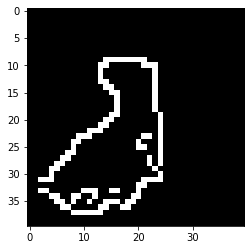

10252_Amanita_muscaria/PELA2012PIC39026703.JPG


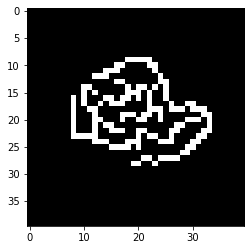

10252_Amanita_muscaria/PT2010PIC39092593.JPG


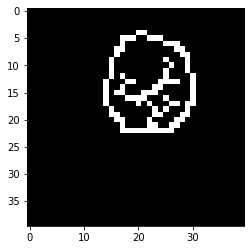

10252_Amanita_muscaria/PT2011PIC42679926.JPG


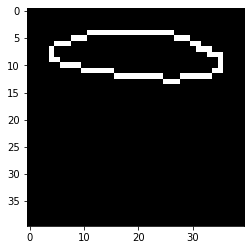

10252_Amanita_muscaria/PTP2013PIC30699075.JPG


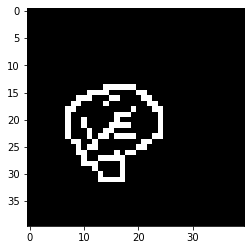

10252_Amanita_muscaria/SL2012PIC70604790.JPG


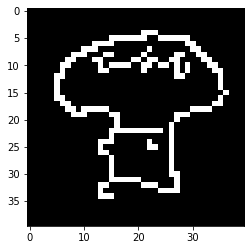

10252_Amanita_muscaria/SOT2017-9227795_SkdC68zaW.JPG


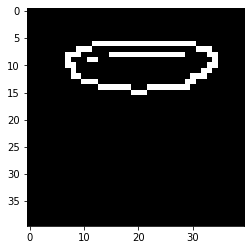

10252_Amanita_muscaria/TAK2013PIC35803352.JPG


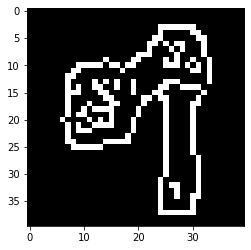

10252_Amanita_muscaria/TAK2017-9198541_Hyu-bclIb.JPG


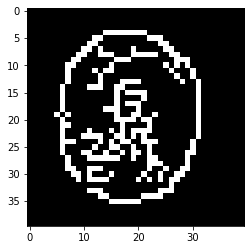

10252_Amanita_muscaria/TAN2017-9205736_S1CPwu2d-.JPG


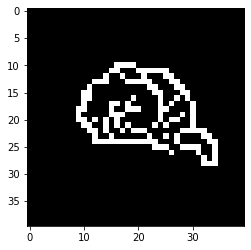

10252_Amanita_muscaria/TAN2017-9208597_HJRRaliF-.JPG


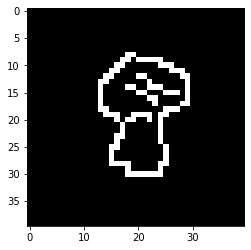

10252_Amanita_muscaria/TIL2016-9176829_rJvTqm0T.JPG


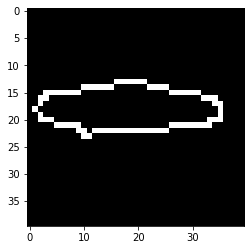

10252_Amanita_muscaria/TKH2011PIC53968985.JPG


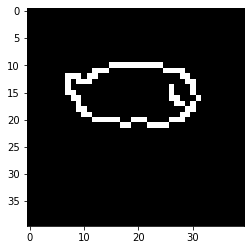

10252_Amanita_muscaria/TL2017-9200912_rJg9Ri_jvb.JPG


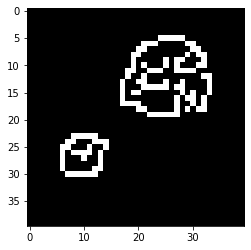

10252_Amanita_muscaria/TOB2017-9201806_rJ2wKv8wW.JPG


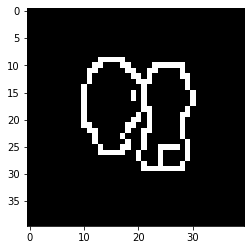

10252_Amanita_muscaria/TSJ2016-9172950_ryPZLXb3.JPG


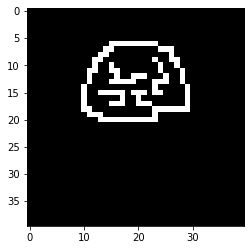

10252_Amanita_muscaria/UFN2017-9225055_Byy5uEKhZ.JPG


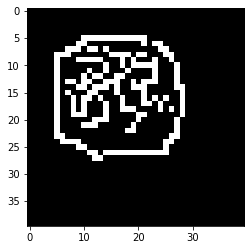

10263_Amanita_rubescens var. rubescens/ALP2011PIC80727718 - Copy.JPG


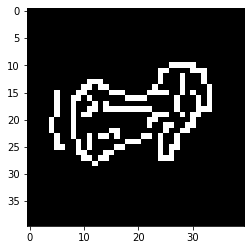

10263_Amanita_rubescens var. rubescens/ALP2011PIC80727718.JPG


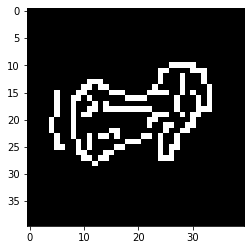

10263_Amanita_rubescens var. rubescens/APE2016-9169618_S1dJExMK - Copy.JPG


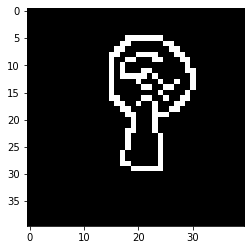

10263_Amanita_rubescens var. rubescens/APE2016-9169618_S1dJExMK.JPG


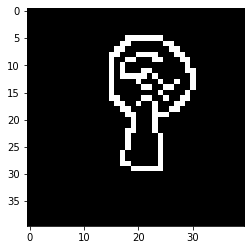

10263_Amanita_rubescens var. rubescens/APE2017-9214437_HklKi4ei- - Copy.JPG


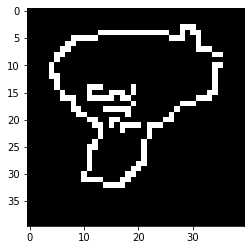

10263_Amanita_rubescens var. rubescens/APE2017-9214437_HklKi4ei-.JPG


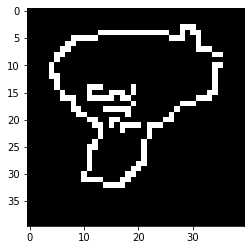

10263_Amanita_rubescens var. rubescens/APE2017-9214437_r1xgKi4gjb - Copy.JPG


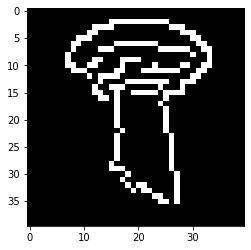

10263_Amanita_rubescens var. rubescens/APE2017-9214437_r1xgKi4gjb.JPG


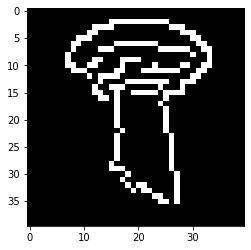

10263_Amanita_rubescens var. rubescens/BWP2010PIC17506775 - Copy.JPG


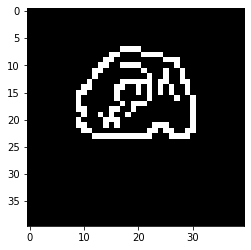

10263_Amanita_rubescens var. rubescens/BWP2010PIC17506775.JPG


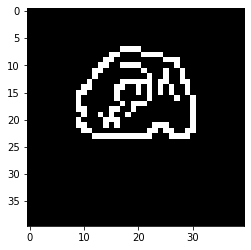

10263_Amanita_rubescens var. rubescens/BWP2010PIC67539068 - Copy.JPG


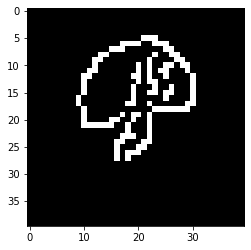

10263_Amanita_rubescens var. rubescens/BWP2010PIC67539068.JPG


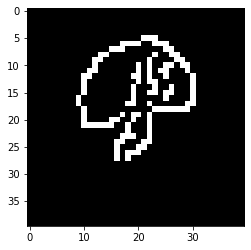

10263_Amanita_rubescens var. rubescens/BWP2011PIC17251090 - Copy.JPG


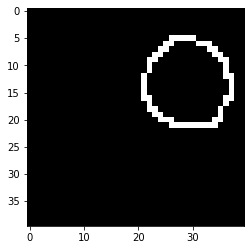

10263_Amanita_rubescens var. rubescens/BWP2011PIC17251090.JPG


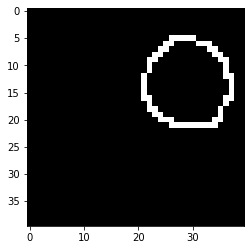

10263_Amanita_rubescens var. rubescens/FDE2009PIC21493603 - Copy.JPG


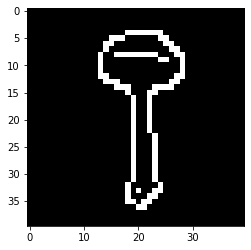

10263_Amanita_rubescens var. rubescens/FDE2009PIC21493603.JPG


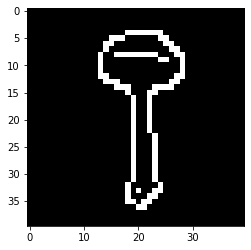

10263_Amanita_rubescens var. rubescens/FDE2009PIC29119462 - Copy.JPG


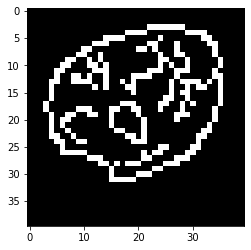

10263_Amanita_rubescens var. rubescens/FDE2009PIC29119462.JPG


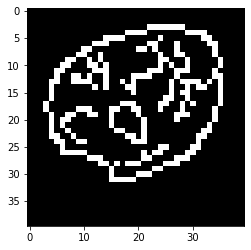

10263_Amanita_rubescens var. rubescens/FDE2009PIC39994728 - Copy.JPG


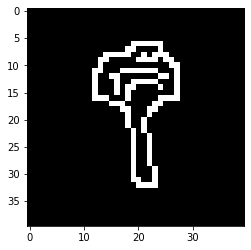

10263_Amanita_rubescens var. rubescens/FDE2009PIC39994728.JPG


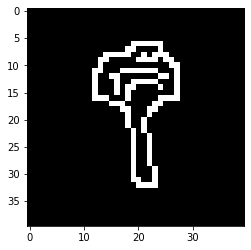

10263_Amanita_rubescens var. rubescens/FDE2009PIC45095016 - Copy.JPG


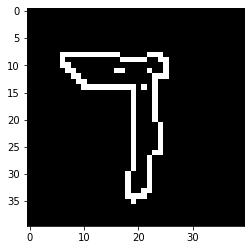

10263_Amanita_rubescens var. rubescens/FDE2009PIC45095016.JPG


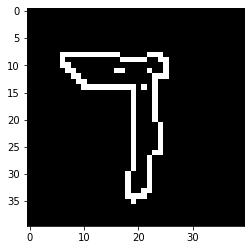

10263_Amanita_rubescens var. rubescens/FDE2009PIC51247291 - Copy.JPG


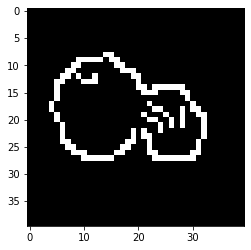

10263_Amanita_rubescens var. rubescens/FDE2009PIC51247291.JPG


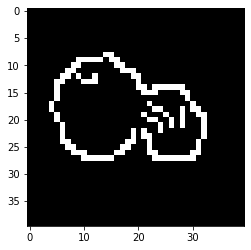

10263_Amanita_rubescens var. rubescens/FDE2009PIC78277021 - Copy.JPG


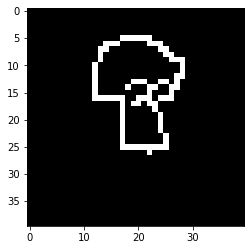

10263_Amanita_rubescens var. rubescens/FDE2009PIC78277021.JPG


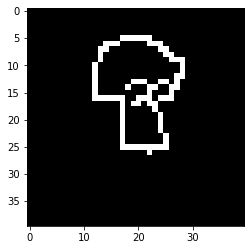

10263_Amanita_rubescens var. rubescens/FDE2011PIC39976893 - Copy.JPG


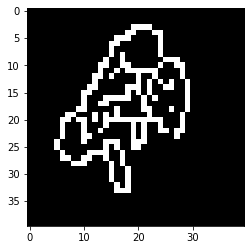

10263_Amanita_rubescens var. rubescens/FDE2011PIC39976893.JPG


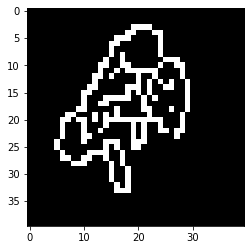

10263_Amanita_rubescens var. rubescens/FDE2011PIC66463738 - Copy.JPG


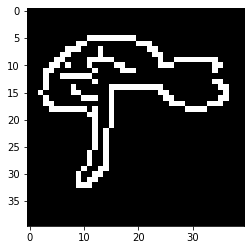

10263_Amanita_rubescens var. rubescens/FDE2011PIC66463738.JPG


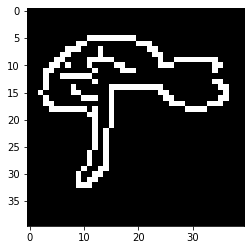

10263_Amanita_rubescens var. rubescens/FDE2013PIC34722411 - Copy.JPG


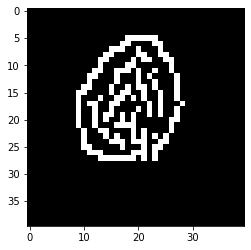

10263_Amanita_rubescens var. rubescens/FDE2013PIC34722411.JPG


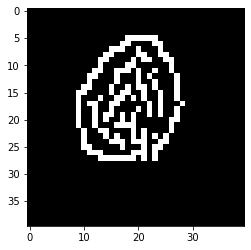

10263_Amanita_rubescens var. rubescens/FDE2016-9168464_HJlR3xeZO - Copy.JPG


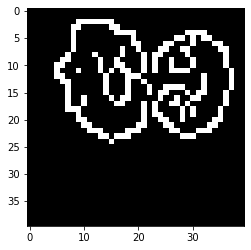

10263_Amanita_rubescens var. rubescens/FDE2016-9168464_HJlR3xeZO.JPG


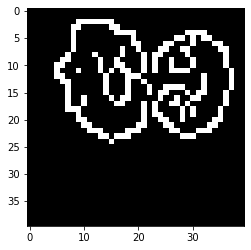

10263_Amanita_rubescens var. rubescens/FDE2016-9168464_HyR2leWd - Copy.JPG


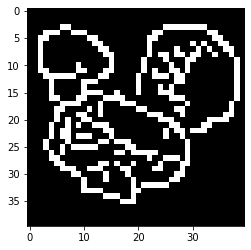

10263_Amanita_rubescens var. rubescens/FDE2016-9168464_HyR2leWd.JPG


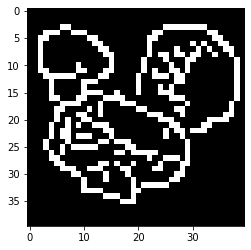

10263_Amanita_rubescens var. rubescens/FS2010PIC19787877 - Copy.JPG


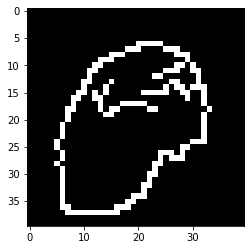

10263_Amanita_rubescens var. rubescens/FS2010PIC19787877.JPG


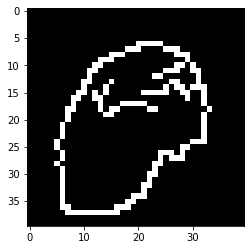

10263_Amanita_rubescens var. rubescens/FS2010PIC86914242 - Copy.JPG


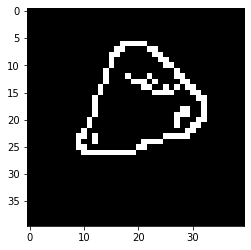

10263_Amanita_rubescens var. rubescens/FS2010PIC86914242.JPG


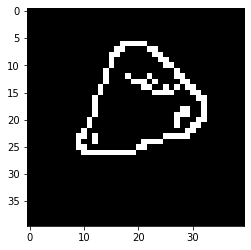

10263_Amanita_rubescens var. rubescens/FS2011PIC59813258 - Copy.JPG


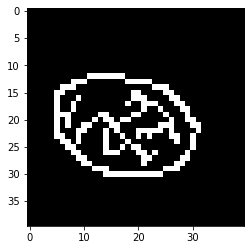

10263_Amanita_rubescens var. rubescens/FS2011PIC59813258.JPG


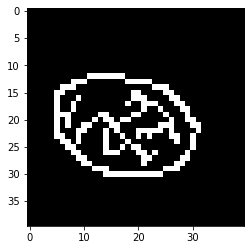

10263_Amanita_rubescens var. rubescens/FS2013PIC23415530 - Copy.JPG


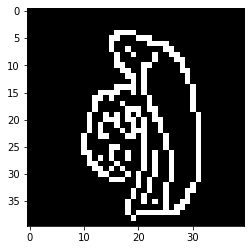

10263_Amanita_rubescens var. rubescens/FS2013PIC23415530.JPG


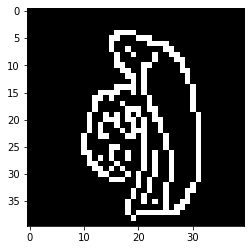

10263_Amanita_rubescens var. rubescens/FS2015PIC28838600 - Copy.JPG


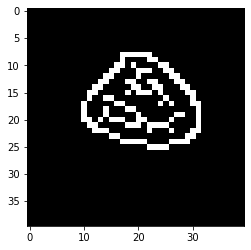

10263_Amanita_rubescens var. rubescens/FS2015PIC28838600.JPG


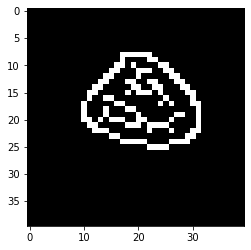

10263_Amanita_rubescens var. rubescens/FS2015PIC61885118 - Copy.JPG


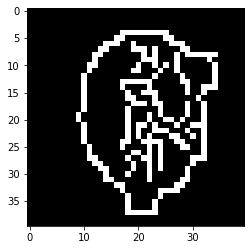

10263_Amanita_rubescens var. rubescens/FS2015PIC61885118.JPG


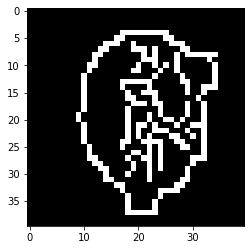

10263_Amanita_rubescens var. rubescens/FS2015PIC74028534 - Copy.JPG


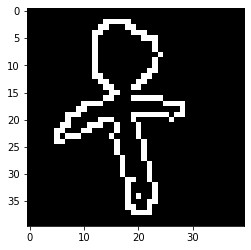

10263_Amanita_rubescens var. rubescens/FS2015PIC74028534.JPG


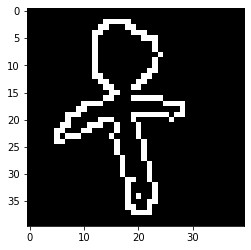

10263_Amanita_rubescens var. rubescens/FS2016-9174606_HybYEriZT - Copy.JPG


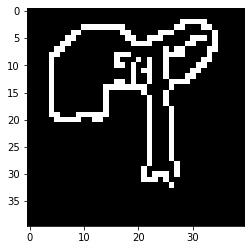

10263_Amanita_rubescens var. rubescens/FS2016-9174606_HybYEriZT.JPG


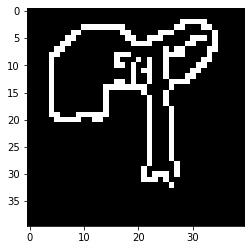

10263_Amanita_rubescens var. rubescens/FS2016-9174606_rktNBiZp - Copy.JPG


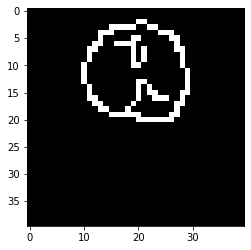

10263_Amanita_rubescens var. rubescens/FS2016-9174606_rktNBiZp.JPG


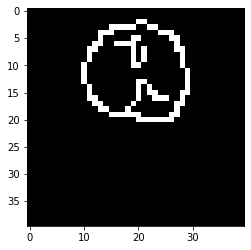

10263_Amanita_rubescens var. rubescens/FVL2009PIC87578256 - Copy.JPG


In [ ]:
train_index = 0
test_index = 0
for mushroomName in mushroomNames:
    dirListing = os.listdir('../../MushroomImage/' + file_under_use + mushroomName)
    numImages = len(dirListing) 
    train = int(numImages * (3/4))
    count = 0
    for imageName in os.listdir('../../MushroomImage/' + file_under_use + mushroomName):
        
        image = cv2.imread('../../MushroomImage/' + file_under_use + mushroomName + '/' + imageName, cv2.IMREAD_GRAYSCALE)
        filter = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
        image = cv2.blur(image, (3,3))
        print(mushroomName + '/' + imageName)
        
        if count <= train:
            images_train[train_index] = np.append(extract_lines(image), np.array([mushroomNames.index(mushroomName)]), axis = 0)
            train_index += 1
        else:
            images_test[test_index] = np.append(extract_lines(image), np.array([mushroomNames.index(mushroomName)]), axis = 0)
            test_index += 1
        count += 1

In [85]:
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

mushroom_train_data = images_train[:,:imagePixelSize]
mushroom_train_target = images_train[:,-1]
mushroom_test_data = images_test[:,:imagePixelSize]
mushroom_test_target = images_test[:,-1]

#scaler = LinearDiscriminantAnalysis()
#scaler.fit(mushroom_train_data, mushroom_train_target)
#mushroom_train_data = scaler.transform(mushroom_train_data)
#mushroom_test_data = scaler.transform(mushroom_test_data)

#pca = PCA(n_components=0.5, whiten=True)
#pca.fit(mushroom_train_data)
#mushroom_train_data = pca.transform(mushroom_train_data)
#mushroom_test_data = pca.transform(mushroom_test_data)
#print(mushroom_train_data)


#knn = tree.DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors= 11)


knn.fit(mushroom_train_data, mushroom_train_target)
print(knn.get_params().keys())

knnScore = knn.score(mushroom_test_data,mushroom_test_target)
print(knnScore)
predict = knn.predict(mushroom_test_data)

for i in np.arange(mushroom_test_target.shape[0]):
    print(mushroomNames[int(predict[i])] + "    " + mushroomNames[int(mushroom_test_target[i])])
print(mushroom_test_target)

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])
0.2569444444444444
12587_Cortinarius_rubellus    10056_Agaricus_arvensis
12587_Cortinarius_rubellus    10056_Agaricus_arvensis
10056_Agaricus_arvensis    10056_Agaricus_arvensis
10056_Agaricus_arvensis    10056_Agaricus_arvensis
10056_Agaricus_arvensis    10056_Agaricus_arvensis
12587_Cortinarius_rubellus    10056_Agaricus_arvensis
10056_Agaricus_arvensis    10056_Agaricus_arvensis
14119_Galerina_marginata    10056_Agaricus_arvensis
10252_Amanita_muscaria    10056_Agaricus_arvensis
10263_Amanita_rubescens var. rubescens    10056_Agaricus_arvensis
10252_Amanita_muscaria    10056_Agaricus_arvensis
10263_Amanita_rubescens var. rubescens    10056_Agaricus_arvensis
14119_Galerina_marginata    10056_Agaricus_arvensis
10056_Agaricus_arvensis    10056_Agaricus_arvensis
10263_Amanita_rubescens var. rubescens    10056_Agaricus_arvensis
14119_Galerina_marginata    10056_Agaricus_arvensis
1106

In [86]:
from numpy import savetxt
savetxt('../mushroom_images/mushroom_image_train_shape_data.csv', mushroom_train_data, delimiter=',')
savetxt('../mushroom_images/mushroom_image_train_shape_target.csv', mushroom_train_target, delimiter=',')
savetxt('../mushroom_images/mushroom_image_test_shape_data.csv', mushroom_test_data, delimiter=',')
savetxt('../mushroom_images/mushroom_image_test_shape_target.csv', mushroom_test_target, delimiter=',')

## deletes images

print(image.flatten().shape)
for mushroomName in mushroomNames:
    for imageName in os.listdir('../../MushroomImage/' + file_under_use + mushroomName):
        for imageName in os.listdir('../../MushroomImage/' + file_under_use + mushroomName):
            os.remove('../../MushroomImage/' + file_under_use + mushroomName + '/' + imageName)
        


## Removes folders with less than 15 images

import shutil

for mushroomName in mushroomNames:
    dirListing = os.listdir('../../MushroomImage/images_nobg/' + mushroomName)
    if(len(dirListing) < 15):
        try:
            shutil.rmtree('../../MushroomImage/images_nobg/' + mushroomName)
        except OSError as e:
            print("Error: %s : %s" % (dir_path, e.strerror))
    print(len(dirListing))




mushroomNames = []
for mushroomName in os.listdir('../../MushroomImage/' + 'images_qual/'):
    mushroomNames.append(mushroomName)

for mushroomName in mushroomNames[:]:
    for imageName in os.listdir('../../MushroomImage/' + 'images_qual/' + mushroomName):
        image = cv2.imread('../../MushroomImage/' + 'images_qual/' + mushroomName + '/' + imageName, cv2.IMREAD_COLOR)
        try:
            image = cv2.resize(image, (100,100))
        except:
            break
        #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        rectangle = (5,5,90,90)
        mask = np.zeros(image.shape[:2], np.uint8)
        bgdModel = np.zeros((1,65), np.float64)
        fgdModel = np.zeros((1,65), np.float64)
        
        cv2.grabCut(image,
                   mask,
                   rectangle,
                   bgdModel,
                   fgdModel,
                   5,
                   cv2.GC_INIT_WITH_RECT)
        
        mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')
    
        image_nobg = image * mask_2[:,:,np.newaxis]
        sparsity = 1.0 - np.count_nonzero(image_nobg) / image_nobg.size
        plt.imshow(image_nobg)
        if(sparsity < 0.9):
            cv2.imwrite('../../MushroomImage/' + file_under_use  + mushroomName + '/' + imageName, image_nobg)
            print(mushroomName)
        #cv2.imwrite('../../MushroomImage/' + file_under_use  + mushroomName + '/' + imageName, image)
print(image.flatten().shape)